In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # normalização de dados
from sklearn.model_selection import train_test_split # dividir dados entre treinmaneto e teste
from sklearn.metrics import r2_score #verificar o erro entre a predição e o valor real
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

In [8]:
dataset = pd.read_csv("./auto-mpg.csv")

Text(0.5, 1.0, 'Relação entre o peso e a autonomia dos veículos')

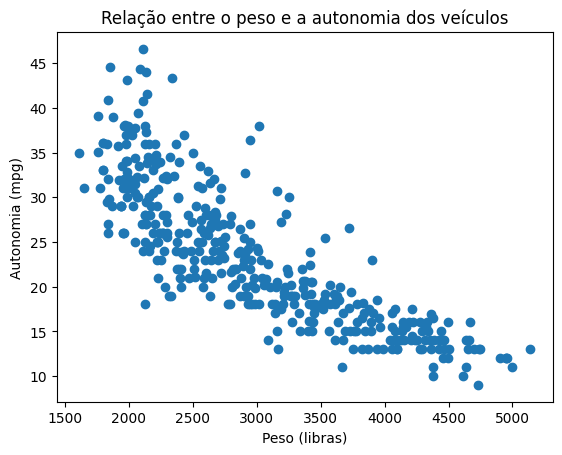

In [9]:
plt.scatter(dataset[['weight']], dataset[['mpg']])
plt.xlabel("Peso (libras)")
plt.ylabel("Autonomia (mpg)")
plt.title("Relação entre o peso e a autonomia dos veículos")


In [12]:
X = dataset[['weight']]
Y = dataset[['mpg']]



In [13]:
#Transformação de libras para Kg
dataset[['weight']] = dataset[['weight']] * 0.453592

#Milhas/galao para Km/litro
dataset[['mpg']] = dataset[['mpg']] * 0.425144

In [14]:
X

,weight
0,1589.386368
1,1675.115256
2,1558.542112
3,1557.181336
4,1564.438808
...,...
393,1265.521680
394,966.150960
395,1040.993640
396,1190.679000


In [15]:
X.describe()

,weight
count,398.000000
mean,1347.360846
std,384.120654
min,731.643896
25%,1008.675210
50%,1271.645172
75%,1636.559936
max,2331.462880


In [16]:
escala = StandardScaler()
escala.fit(X)

X_norm = escala.transform(X)

In [17]:
X

,weight
0,1589.386368
1,1675.115256
2,1558.542112
3,1557.181336
4,1564.438808
...,...
393,1265.521680
394,966.150960
395,1040.993640
396,1190.679000


In [18]:
X_norm

array([[ 0.63086987],
       [ 0.85433297],
       [ 0.55047045],
       [ 0.54692342],
       [ 0.56584093],
       [ 1.62049216],
       [ 1.63586264],
       [ 1.58620417],
       [ 1.71980909],
       [ 1.03996105],
       [ 0.7006282 ],
       [ 0.75501604],
       [ 0.93473239],
       [ 0.1366499 ],
       [-0.70754402],
       [-0.16248324],
       [-0.23224156],
       [-0.45333997],
       [-0.99367137],
       [-1.34246298],
       [-0.35284069],
       [-0.63896804],
       [-0.70399699],
       [-0.87070755],
       [-0.38121696],
       [ 1.94445453],
       [ 1.66187422],
       [ 1.66896828],
       [ 2.08278883],
       [-0.99367137],
       [-0.83523722],
       [-0.87780162],
       [-1.0929883 ],
       [-0.39776978],
       [ 0.55401749],
       [ 0.4239596 ],
       [ 0.3920363 ],
       [ 0.37548348],
       [ 1.4644227 ],
       [ 1.76592053],
       [ 1.39939375],
       [ 1.33081778],
       [ 2.34645164],
       [ 2.09934165],
       [ 2.56518536],
       [-0

In [23]:
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3)

In [24]:
rna = MLPRegressor(hidden_layer_sizes=(10, 5),
                   max_iter=2000,
                   tol=0.00000001,
                   learning_rate_init=0.1,
                   solver="sgd",
                   activation="logistic",
                   learning_rate="constant",
                   verbose=2)

In [25]:
rna.fit(X_norm_train, Y_train)

Iteration 1, loss = 41.01819685
Iteration 2, loss = 7.68776530
Iteration 3, loss = 7.57031731
Iteration 4, loss = 5.01902848
Iteration 5, loss = 4.66936669
Iteration 6, loss = 3.92489229
Iteration 7, loss = 3.16915390
Iteration 8, loss = 2.58807042
Iteration 9, loss = 2.17325364
Iteration 10, loss = 1.97189667
Iteration 11, loss = 1.95010710
Iteration 12, loss = 2.01409957
Iteration 13, loss = 2.07496271
Iteration 14, loss = 2.10295712
Iteration 15, loss = 2.10109936
Iteration 16, loss = 2.07068761
Iteration 17, loss = 2.04176237
Iteration 18, loss = 2.01585065
Iteration 19, loss = 1.99830931
Iteration 20, loss = 1.98657447
Iteration 21, loss = 1.98199530
Iteration 22, loss = 1.98018388
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


/home/wesley/dev/projetos/tcc/multilayer_perceptron/auto_mpg_vehicle/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-08,
             verbose=2)

In [26]:
Y_rna_previsao = rna.predict(X_norm_test) #prever valores com base no conjunto separado para testes

In [27]:
r2_rna = r2_score(Y_test, Y_rna_previsao)

print("R2 RNA:", r2_rna)

R2 RNA: 0.691729266474421


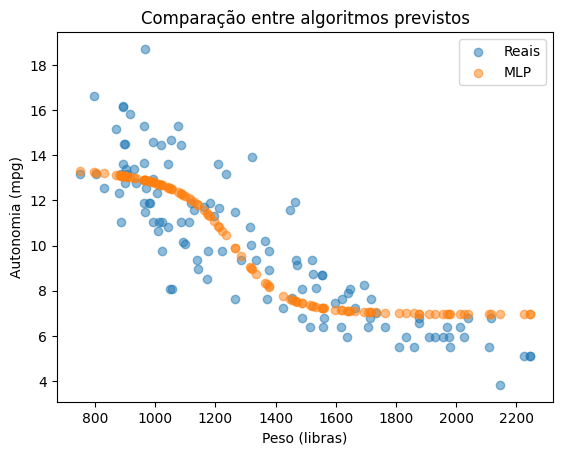

In [28]:
X_test = escala.inverse_transform(X_norm_test)
plt.scatter(X_test, Y_test, alpha=0.5, label="Reais")
plt.scatter(X_test, Y_rna_previsao, alpha=0.5, label="MLP")
plt.xlabel("Peso (libras)")
plt.ylabel("Autonomia (mpg)")
plt.title("Comparação entre algoritmos previstos")
plt.legend(loc=1)